# K-Means Clustering
This notebook provides the code for the K-means Clustering chapters in Part 3 of the Exploratory Data Analysis course. Please review in conjunction with the course notes.

## Carry out a K-means Clustering

###  Loading, Cleaning and Standardising the Data
Import the libraries we need.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import the kmeans algorithm
from sklearn.cluster import KMeans

# Import functions created for this course
from functions import *

Load the data set:

In [2]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('world_university_rankings_2016.csv', index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


Filter our data down to just the remaining columns of interest:

In [3]:
X = original_data[['teaching', 'international', 'research', 
        'citations', 'income', 'num_students', 'student_staff_ratio', 
        'international%', 'female%', 'male%']]
X.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.0,63.0


Replace nulls with the mean value of the variable:

In [4]:
X = X.fillna(X.mean()) 

Apply the standard scaler:

In [6]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

### Performing a K-means Clustering

Perform the k-means clustering:

In [18]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Put the cluster number on as a new column on the original data:

In [8]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
university_name,,,,,,,,,,,
California Institute of Technology,4.274564,0.654655,3.558974,1.794039,2.536181,-0.976050,-0.980509,1.348510,-1.442358,1.442358,2
University of Oxford,3.666926,1.938656,3.625572,1.757041,1.306195,-0.188914,-0.603279,2.008736,-0.308569,0.308569,2
Stanford University,4.067566,1.174169,3.487253,1.797739,0.818185,-0.381423,-0.908273,0.876919,-0.657427,0.657427,2
University of Cambridge,3.780441,1.816169,3.512867,1.690445,0.404870,-0.238210,-0.587226,2.008736,-0.308569,0.308569,2
Massachusetts Institute of Technology,3.860569,1.499393,3.097910,1.790340,2.416668,-0.582793,-0.811959,1.914418,-1.093500,1.093500,2


### Selecting the number of clusters
Produce an elbow curve:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

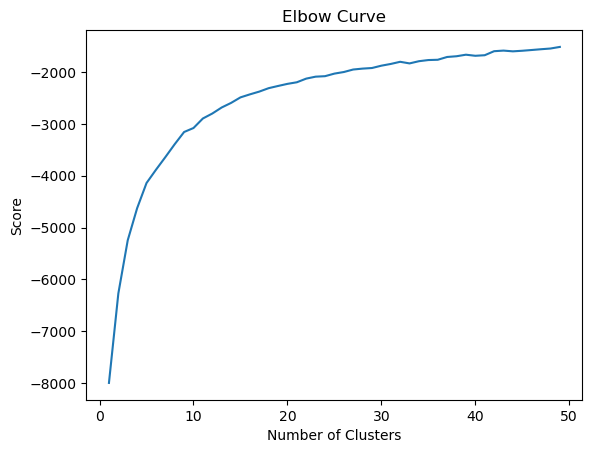

In [19]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Analysing the Results

Perform the PCA, asking for 2 principal components:

In [9]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

Confirm we have the new vector space and clusters:

In [10]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
university_name,,,
California Institute of Technology,5.555064,-3.811757,2
University of Oxford,5.977205,-1.462953,2
Stanford University,5.231170,-2.141250,2
University of Cambridge,5.735713,-1.242813,2
Massachusetts Institute of Technology,5.721362,-2.896713,2


Apply the same PCA transformation to the centroids:

In [11]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

Display the data points and centroids (as red crosses):

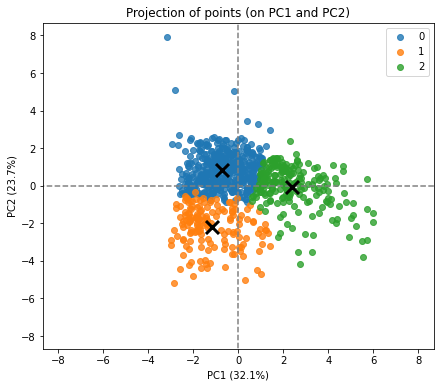

In [12]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

## Interpreting the Meaning of the Clusters


### Parallel Coordinates Plot
Produce a parallel coordinates plot of all data points:

In [16]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

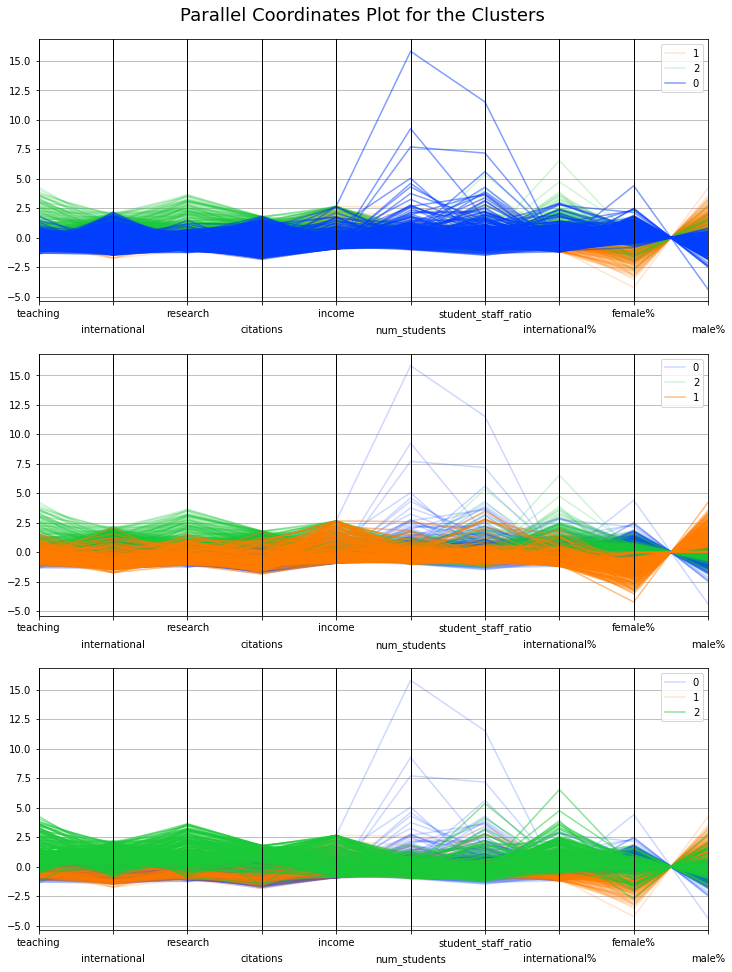

In [17]:
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

Produce a parallel coordinates plot of the centroids:

In [20]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index
centroids
#display_parallel_coordinates_centroids(centroids, 10)

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
0,-0.443621,-0.174841,-0.479564,-0.251657,-0.405710,0.125538,0.129556,-0.255068,0.482171,-0.482171,0
1,-0.267429,-0.778089,-0.287339,-0.661870,0.496125,-0.286661,-0.197770,-0.522411,-1.508635,1.508635,1
2,1.122094,0.947565,1.211689,1.019773,0.469791,-0.045348,-0.120467,0.922096,0.132026,-0.132026,2
